In [11]:
import sys

sys.path.append("/root/autodl-tmp/deeplabv3")
from datasets import DatasetSeq # (this needs to be imported before torch, because cv2 needs to be imported before torch for some reason)

sys.path.append("/root/autodl-tmp/deeplabv3/model")
from deeplabv3 import DeepLabV3

sys.path.append("/root/autodl-tmp/deeplabv3/utils")
from utils import label_img_to_color

import torch
import torch.utils.data
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pickle
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

import os

In [23]:
cityscapes_data_path = "/root/autodl-tmp/deeplabv3/data/cityscapes"#"/root/deeplabv3/data/cityscapes"
cityscapes_meta_path = "/root/autodl-tmp/deeplabv3/data/cityscapes/meta"#"/root/deeplabv3/data/cityscapes/meta"
cityscapes_pred_path = "/root/autodl-tmp/deeplabv3/training_logs"

train_dirs = ["jena/", "zurich/", "weimar/", "ulm/", "tubingen/", "stuttgart/",
            "strasbourg/", "monchengladbach/", "krefeld/", "hanover/",
            "hamburg/", "erfurt/", "dusseldorf/", "darmstadt/", "cologne/",
            "bremen/", "bochum/", "aachen/"]
val_dirs = ["frankfurt/", "munster/", "lindau/"]
test_dirs = ["berlin/", "bielefeld/", "bonn/", "leverkusen/", "mainz/", "munich/"]

if not os.path.exists(cityscapes_meta_path):
    os.makedirs(cityscapes_meta_path)
if not os.path.exists(cityscapes_meta_path + "/label_imgs"):
    os.makedirs(cityscapes_meta_path + "/label_imgs")


img_dir = cityscapes_data_path + "/leftImg8bit/val/"   # get img id
origin_dir = cityscapes_meta_path + "/label_imgs/"      # get orig label
predict_dir = cityscapes_pred_path + "/model_eval_seq/" # get pred label


In [ ]:
APs = []
IOUs = []
for val_dirs in val_dirs:
    print (val_dirs)

    train_img_dir_path = img_dir + val_dirs 
    file_names = os.listdir(train_img_dir_path)
    for file_name in file_names:
        img_id = file_name.split("_leftImg8bit.png")[0]

        gtOrin_img_path = origin_dir + img_id + ".png"
        gtPred_img_path = predict_dir + img_id + "_label.png"
        # 
        original_image = cv2.imread(gtOrin_img_path, 0)    # 
        original_image = cv2.resize(original_image, (1024, 512),
                     interpolation=cv2.INTER_NEAREST)
        predicted_image = cv2.imread(gtPred_img_path, 0)  # 

        # acc AP
        correctly_classified_pixels = np.sum(predicted_image == original_image)
        total_pixels = predicted_image.size
        pixel_accuracy = correctly_classified_pixels / total_pixels

        # 
        print("Pixel Accuracy:", pixel_accuracy)
        APs.append(pixel_accuracy)

        #acc IOU
        if predicted_image is not None and original_image is not None:
            intersection = np.logical_and(predicted_image, original_image)
            union = np.logical_or(predicted_image, original_image)

            iou = np.sum(intersection) / np.sum(union)
            print("Intersection over Union (IoU):", iou)
            IOUs.append(iou)
        else:
            print("Image loading failed.")

APs = np.array(APs)
np.save('APs.npy', APs)

APs = np.load('APs.npy')

IOUs = np.array(IOUs)
np.save('IOUs.npy', IOUs)

IOUs = np.load('IOUs.npy')

print(APs,IOUs)
print("Intersection over Union (IoU):", iou)

Pixel Accuracy: 0.86769234085083
Intersection over Union (IoU): 0.954983232183881


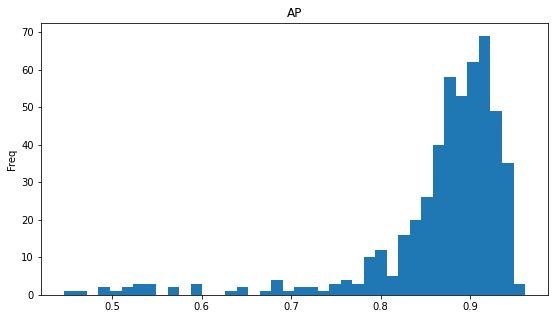

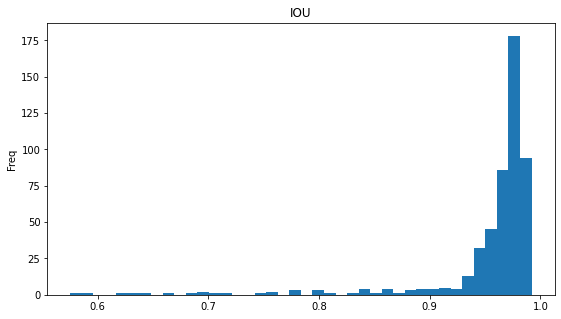

In [22]:
file_path_1 = "/root/autodl-tmp/deeplabv3/PAs.npy"
file_path_2= "/root/autodl-tmp/deeplabv3/IOUs.npy"
if os.path.exists(file_path_1) and os.path.exists(file_path_2):
    APs = np.load(file_path_1)        
    IOUs = np.load(file_path_2)
    print("Pixel Accuracy:", APs.sum()/len(APs))
    print("Intersection over Union (IoU):", IOUs.sum()/len(IOUs))
    
    plt.figure(figsize=(20, 5)) 
    plt.subplot(1, 2, 1)
    plt.hist(APs, bins=40)
    plt.ylabel("Freq")
    plt.title("AP")
    plt.show()
    plt.figure(figsize=(20, 5)) 
    plt.subplot(1, 2, 2)
    plt.hist(IOUs, bins=40)
    plt.ylabel("Freq")
    plt.title("IOU")